In [1]:
import numpy as np
import pandas as pd

In [5]:
# Load Datasets

tennis_train_men = pd.read_csv("Dataset/mens_train_file.csv")
tennis_test_men = pd.read_csv("Dataset/mens_test_file.csv")

tennis_train_women = pd.read_csv("Dataset/womens_train_file.csv")
tennis_test_women = pd.read_csv("Dataset/womens_test_file.csv")

In [44]:
tennis_train_men.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 28 columns):
rally                                 5000 non-null int64
serve                                 5000 non-null int64
hitpoint                              5000 non-null object
speed                                 5000 non-null float64
net.clearance                         5000 non-null float64
distance.from.sideline                5000 non-null float64
depth                                 5000 non-null float64
outside.sideline                      5000 non-null bool
outside.baseline                      5000 non-null bool
player.distance.travelled             5000 non-null float64
player.impact.depth                   5000 non-null float64
player.impact.distance.from.center    5000 non-null float64
player.depth                          5000 non-null float64
player.distance.from.center           5000 non-null float64
previous.speed                        5000 non-null float64
prev

In [11]:
tennis_train_women.head()

,rally,serve,hitpoint,speed,net.clearance,distance.from.sideline,depth,outside.sideline,outside.baseline,player.distance.travelled,...,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,id,train,outcome,gender
0,3,2,B,30.940461,-0.183663,1.986714,7.834750,False,False,1.168944,...,12.3106,4.0826,False,B,0.473264,True,3036,1,UE,womens
1,3,1,F,29.510526,0.227835,2.871543,6.850738,False,False,2.256467,...,12.5244,2.7324,False,F,0.455574,True,1804,1,W,womens
2,5,1,B,30.851879,0.217549,2.026891,6.572250,False,False,2.888694,...,15.2350,1.4222,False,B,0.654023,True,2727,1,UE,womens
3,14,2,B,21.386176,4.543886,0.295634,1.741846,True,False,2.666415,...,7.2042,2.9014,False,F,0.273406,False,1097,1,UE,womens
4,3,1,B,33.227040,0.640659,0.603025,1.512817,False,False,4.516474,...,12.0662,4.5538,False,F,1.056509,True,5576,1,W,womens


In [227]:
# Gather all Numerical and Categorical Data

tennis_train_men_num = tennis_train_men.drop(["serve","hitpoint","outside.sideline","outside.baseline","same.side","previous.hitpoint","server.is.impact.player","id","train","outcome","gender"],axis=1)

tennis_train_women_num = tennis_train_women.drop(["serve","hitpoint","outside.sideline","outside.baseline","same.side","previous.hitpoint","server.is.impact.player","id","train","outcome","gender"],axis=1)

tennis_test_men_num = tennis_test_men.drop(["serve","hitpoint","outside.sideline","outside.baseline","same.side","previous.hitpoint","server.is.impact.player","id","train","outcome","gender"],axis=1)

tennis_test_women_num = tennis_test_women.drop(["serve","hitpoint","outside.sideline","outside.baseline","same.side","previous.hitpoint","server.is.impact.player","id","train","outcome","gender"],axis=1)

#Categorical Data

tennis_train_men_cat = tennis_train_men[["hitpoint","previous.hitpoint","outcome"]]

tennis_train_women_cat = tennis_train_women[["hitpoint","previous.hitpoint","outcome"]]

tennis_test_men_cat = tennis_test_men[["hitpoint","previous.hitpoint","outcome"]]

tennis_test_women_cat = tennis_test_women[["hitpoint","previous.hitpoint","outcome"]]

# Boolean Data

tennis_train_men_bool = tennis_train_men[["outside.sideline","outside.baseline","same.side","server.is.impact.player"]]

tennis_train_women_bool = tennis_train_women[["outside.sideline","outside.baseline","same.side","server.is.impact.player"]]

tennis_test_men_bool = tennis_test_men[["outside.sideline","outside.baseline","same.side","server.is.impact.player"]]

tennis_test_women_bool = tennis_test_women[["outside.sideline","outside.baseline","same.side","server.is.impact.player"]]

#ID and Gender

tennis_train_men_ig  = tennis_train_men[["id","gender"]]

tennis_train_women_ig = tennis_train_women[["id","gender"]]

tennis_test_men_ig = tennis_test_men[["id","gender"]]

tennis_test_women_ig = tennis_test_women[["id","gender"]]


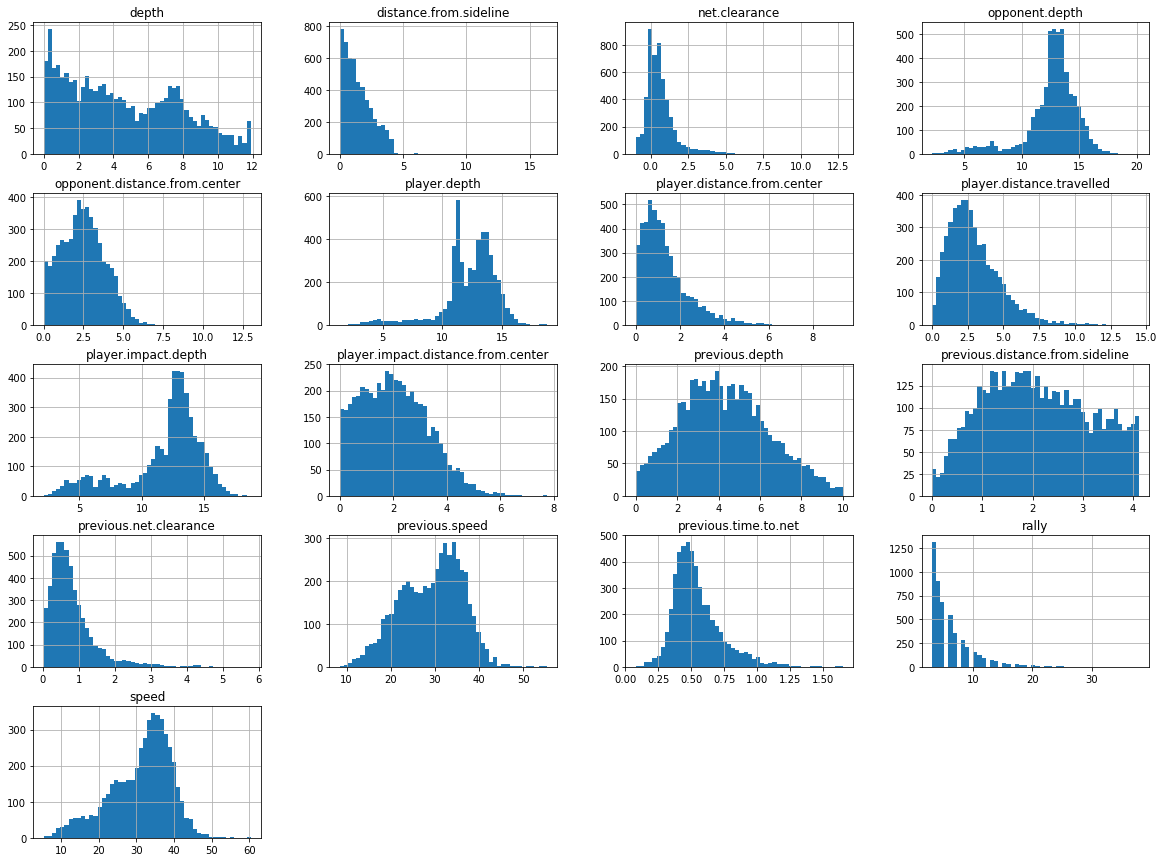

In [49]:
#Plot histograms

%matplotlib inline
import matplotlib.pyplot as plt
tennis_train_men_num.hist(bins=50,figsize=(20,15))
plt.show()

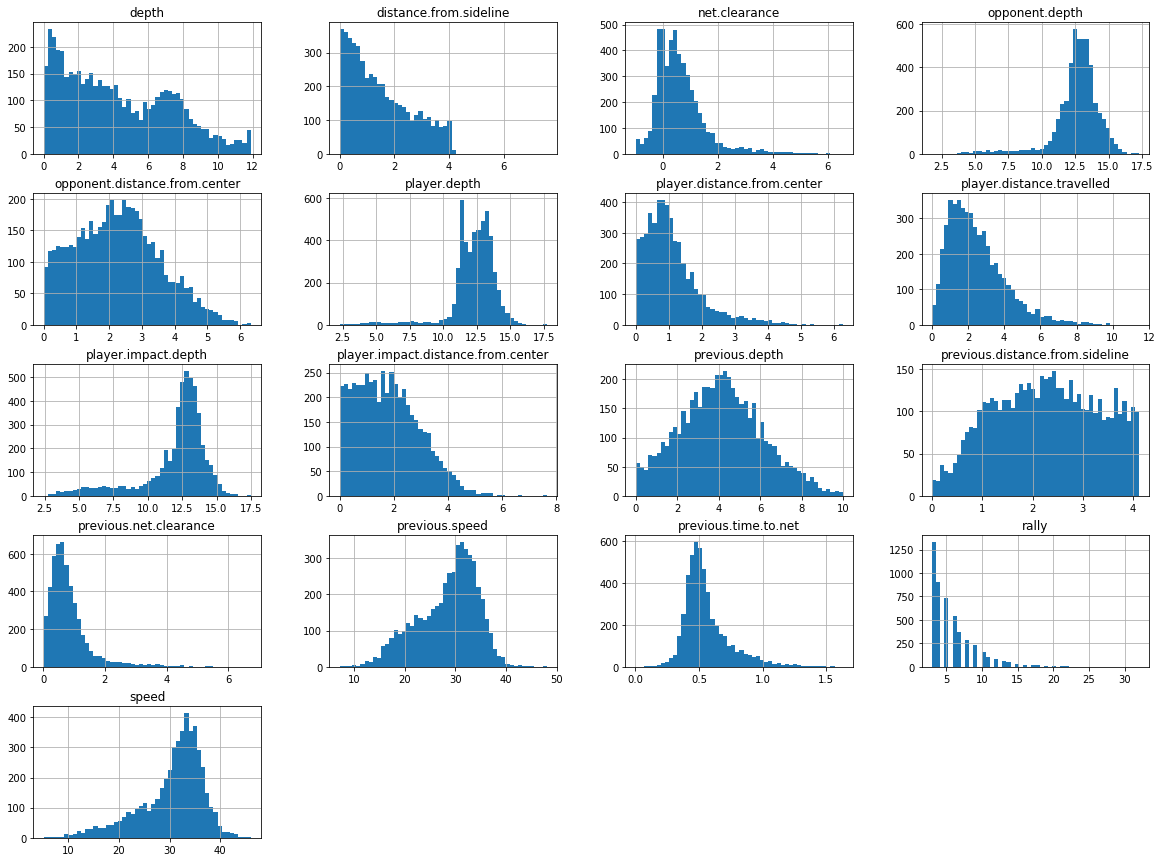

In [38]:
#Hist for Women

tennis_train_women_num.hist(bins=50,figsize=(20,15))
plt.show()

In [41]:
# Correlation Matrix

mens_corr = tennis_train_men_num.corr()
mens_corr

,rally,speed,net.clearance,distance.from.sideline,depth,player.distance.travelled,player.impact.depth,player.impact.distance.from.center,player.depth,player.distance.from.center,previous.speed,previous.net.clearance,previous.distance.from.sideline,previous.depth,opponent.depth,opponent.distance.from.center,previous.time.to.net
rally,1.000000,-0.037537,-0.007921,0.014302,0.031965,0.076451,0.069478,0.110178,0.173673,0.136266,0.122473,-0.052035,-0.152068,-0.035741,0.052030,-0.158944,-0.057504
speed,-0.037537,1.000000,-0.078715,-0.191485,-0.288888,-0.125101,0.337634,0.098788,0.311366,-0.013684,-0.065003,0.257134,0.152340,-0.183944,0.161110,0.006704,0.156003
net.clearance,-0.007921,-0.078715,1.000000,-0.061907,-0.520385,-0.030967,0.148082,0.010024,0.079417,0.011072,0.113795,-0.044458,-0.069141,-0.154031,-0.114824,-0.023687,-0.165738
distance.from.sideline,0.014302,-0.191485,-0.061907,1.000000,0.355973,-0.017265,-0.005922,-0.049924,-0.054514,-0.017258,0.134527,-0.039587,-0.066710,-0.025200,-0.014569,-0.048696,-0.104436
depth,0.031965,-0.288888,-0.520385,0.355973,1.000000,0.052602,-0.104437,-0.034358,-0.122824,0.010457,0.026901,-0.006936,-0.049813,0.050552,0.009728,-0.060668,-0.014981
player.distance.travelled,0.076451,-0.125101,-0.030967,-0.017265,0.052602,1.000000,-0.134047,0.294719,0.127576,0.355950,-0.318107,0.102187,-0.359701,0.177111,-0.188873,-0.140693,0.234549
player.impact.depth,0.069478,0.337634,0.148082,-0.005922,-0.104437,-0.134047,1.000000,0.252170,0.770338,0.132567,0.535881,-0.276152,-0.205404,-0.659038,-0.041874,-0.157540,-0.535521
player.impact.distance.from.center,0.110178,0.098788,0.010024,-0.049924,-0.034358,0.294719,0.252170,1.000000,0.325930,0.075433,0.074276,-0.071158,-0.600341,-0.035067,-0.054477,-0.011844,-0.047258
player.depth,0.173673,0.311366,0.079417,-0.054514,-0.122824,0.127576,0.770338,0.325930,1.000000,0.181473,0.311318,-0.286338,-0.215303,-0.384851,-0.073772,-0.193446,-0.289811
player.distance.from.center,0.136266,-0.013684,0.011072,-0.017258,0.010457,0.355950,0.132567,0.075433,0.181473,1.000000,-0.089733,-0.047023,-0.063689,-0.092064,-0.190374,-0.076790,-0.062720


In [188]:
print (tennis_train_men_num.shape)
print (tennis_train_men_cat.columns)
print (tennis_train_men_bool.shape)

(5000, 17)
Index(['hitpoint', 'previous.hitpoint', 'outcome'], dtype='object')
(5000, 4)


In [231]:
# StandardScaler to standardise the numerical values for Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

tennis_train_men_num_sc = scaler.fit_transform(tennis_train_men_num)
tennis_train_women_num_sc = scaler.fit_transform(tennis_train_women_num)
tennis_test_men_num_sc = scaler.fit_transform(tennis_test_men_num)
tennis_test_women_num_sc = scaler.fit_transform(tennis_test_women_num)

print (tennis_train_men_num_sc.shape)
print (tennis_test_men_num_sc.shape)

(5000, 17)
(2000, 17)


In [127]:
tennis_train_men_cat.iloc[:9,0]

0    B
1    B
2    B
3    F
4    B
5    B
6    B
7    F
8    F
Name: hitpoint, dtype: object

In [238]:
# Categorical to dummy => Not working

from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()

tennis_train_men_cat_1hot_0 = encoder.fit_transform(tennis_train_men_cat.iloc[:,0])
tennis_train_men_cat_1hot_1 = encoder.fit_transform(tennis_train_men_cat.iloc[:,1])
tennis_train_men_cat_1hot_2 = encoder.fit_transform(tennis_train_men_cat.iloc[:,2])

tennis_train_men_cat_1hot = np.concatenate((tennis_train_men_cat_1hot_0,tennis_train_men_cat_1hot_1),axis=1)
print ("tennis_train_men_cat_1hot :", tennis_train_men_cat_1hot.shape)

tennis_test_men_cat_1hot_0 = encoder.fit_transform(tennis_test_men_cat.iloc[:,0])
tennis_test_men_cat_1hot_1 = encoder.fit_transform(tennis_test_men_cat.iloc[:,1])

tennis_test_men_cat_1hot = np.concatenate((tennis_test_men_cat_1hot_0,tennis_test_men_cat_1hot_1),axis=1)
print ("tennis_test_men_cat_1hot : ",tennis_test_men_cat_1hot.shape)

tennis_train_women_cat_1hot_0 = encoder.fit_transform(tennis_train_women_cat.iloc[:,0])
tennis_train_women_cat_1hot_1 = encoder.fit_transform(tennis_train_women_cat.iloc[:,1])
tennis_train_women_cat_1hot_2 = encoder.fit_transform(tennis_train_women_cat.iloc[:,2])

tennis_train_women_cat_1hot = np.concatenate((tennis_train_women_cat_1hot_0,tennis_train_women_cat_1hot_1),axis=1)
print ("tennis_train_women_cat_1hot :",tennis_train_women_cat_1hot.shape)

tennis_test_women_cat_1hot_0 = encoder.fit_transform(tennis_test_women_cat.iloc[:,0])
tennis_test_women_cat_1hot_1 = encoder.fit_transform(tennis_test_women_cat.iloc[:,1])

tennis_test_women_cat_1hot = np.concatenate((tennis_test_women_cat_1hot_0,tennis_test_women_cat_1hot_1),axis=1)
print ("tennis_test_women_cat_1hot :", tennis_test_women_cat_1hot.shape)

tennis_train_men_bool_1hot_0 = encoder.fit_transform(tennis_train_men_bool.iloc[:,0])
tennis_train_men_bool_1hot_1 = encoder.fit_transform(tennis_train_men_bool.iloc[:,1])
tennis_train_men_bool_1hot_2 = encoder.fit_transform(tennis_train_men_bool.iloc[:,2])
tennis_train_men_bool_1hot_3 = encoder.fit_transform(tennis_train_men_bool.iloc[:,3])

tennis_train_men_bool_1hot = np.concatenate((tennis_train_men_bool_1hot_0,tennis_train_men_bool_1hot_1,
                                            tennis_train_men_bool_1hot_2,tennis_train_men_bool_1hot_3),axis=1)
print ("tennis_train_men_bool_1hot :",tennis_train_men_bool_1hot.shape)

tennis_test_men_bool_1hot_0 = encoder.fit_transform(tennis_test_men_bool.iloc[:,0])
tennis_test_men_bool_1hot_1 = encoder.fit_transform(tennis_test_men_bool.iloc[:,1])
tennis_test_men_bool_1hot_2 = encoder.fit_transform(tennis_test_men_bool.iloc[:,2])
tennis_test_men_bool_1hot_3 = encoder.fit_transform(tennis_test_men_bool.iloc[:,3])

tennis_test_men_bool_1hot = np.concatenate((tennis_test_men_bool_1hot_0,tennis_test_men_bool_1hot_1,
                                           tennis_test_men_bool_1hot_2,tennis_test_men_bool_1hot_3),axis=1)
print ("tennis_test_men_bool_1hot :",tennis_test_men_bool_1hot.shape)

tennis_train_women_bool_1hot_0 = encoder.fit_transform(tennis_train_women_bool.iloc[:,0])
tennis_train_women_bool_1hot_1 = encoder.fit_transform(tennis_train_women_bool.iloc[:,1])
tennis_train_women_bool_1hot_2 = encoder.fit_transform(tennis_train_women_bool.iloc[:,2])
tennis_train_women_bool_1hot_3 = encoder.fit_transform(tennis_train_women_bool.iloc[:,3])

tennis_train_women_bool_1hot = np.concatenate((tennis_train_women_bool_1hot_0,tennis_train_women_bool_1hot_1,
                                              tennis_train_women_bool_1hot_2,tennis_train_women_bool_1hot_3),axis=1)
print ("tennis_train_women_bool_1hot :",tennis_train_women_bool_1hot.shape)

tennis_test_women_bool_1hot_0 = encoder.fit_transform(tennis_test_women_bool.iloc[:,0])
tennis_test_women_bool_1hot_1 = encoder.fit_transform(tennis_test_women_bool.iloc[:,1])
tennis_test_women_bool_1hot_2 = encoder.fit_transform(tennis_test_women_bool.iloc[:,2])
tennis_test_women_bool_1hot_3 = encoder.fit_transform(tennis_test_women_bool.iloc[:,3])

tennis_test_women_bool_1hot = np.concatenate((tennis_test_women_bool_1hot_0,tennis_test_women_bool_1hot_1,
                                             tennis_test_women_bool_1hot_2,tennis_test_women_bool_1hot_3),axis=1)
print ("tennis_test_women_bool_1hot :",tennis_test_women_bool_1hot.shape)

tennis_train_men_cat_1hot : (5000, 8)
tennis_test_men_cat_1hot :  (2000, 8)
tennis_train_women_cat_1hot : (5000, 8)
tennis_test_women_cat_1hot : (1000, 8)
tennis_train_men_bool_1hot : (5000, 4)
tennis_test_men_bool_1hot : (2000, 4)
tennis_train_women_bool_1hot : (5000, 4)
tennis_test_women_bool_1hot : (1000, 4)


In [239]:
tennis_train_men_cat_1hot_2

array([[0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       ..., 
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]])

In [240]:
print (tennis_train_men_num_sc.shape, tennis_test_men_num_sc.shape)
print (tennis_train_men_cat_1hot.shape, tennis_test_men_cat_1hot.shape)
print (tennis_train_men_bool_1hot.shape, tennis_test_men_bool_1hot.shape)

(5000, 17) (2000, 17)
(5000, 8) (2000, 8)
(5000, 4) (2000, 4)


In [241]:
#To join the numercial , categorical,boolean processed data

tennis_train_men_prep = np.concatenate((tennis_train_men_num_sc,tennis_train_men_cat_1hot,tennis_train_men_bool_1hot), axis=1)
print ("tennis_train_men_prep :", tennis_train_men_prep.shape)

tennis_test_men_prep = np.concatenate((tennis_test_men_num_sc,tennis_test_men_cat_1hot,tennis_test_men_bool_1hot), axis=1)
print ("tennis_test_men_prep :", tennis_test_men_prep.shape)

tennis_train_women_prep = np.concatenate((tennis_train_women_num_sc,tennis_train_women_cat_1hot,tennis_train_women_bool_1hot), axis=1)
print ("tennis_train_women_prep :", tennis_train_women_prep.shape)

tennis_test_women_prep = np.concatenate((tennis_test_women_num_sc,tennis_test_women_cat_1hot,tennis_test_women_bool_1hot), axis=1)
print ("tennis_test_women_prep :", tennis_test_women_prep.shape)

tennis_train_men_prep : (5000, 29)
tennis_test_men_prep : (2000, 29)
tennis_train_women_prep : (5000, 29)
tennis_test_women_prep : (1000, 29)


In [242]:
## COnvert to DataFrames

tennis_train_men_prep = pd.DataFrame(tennis_train_men_prep)
tennis_test_men_prep = pd.DataFrame(tennis_test_men_prep)
tennis_train_women_prep = pd.DataFrame(tennis_train_women_prep)
tennis_test_women_prep = pd.DataFrame(tennis_test_women_prep)


In [243]:
## X and Y split
tennis_train_men_prep

tennis_train_men_x = tennis_train_men_prep.copy()
tennis_train_men_y = tennis_train_men_cat_1hot_2.copy()

# Final Test SET
tennis_test_men_x = tennis_test_men_prep.copy()

tennis_train_women_x = tennis_train_women_prep.copy()
tennis_train_women_y = tennis_train_women_cat_1hot_2.copy()

# Final Test SET
tennis_test_women_x = tennis_test_women_prep.copy()


In [244]:
## Inner Train Test Split

from sklearn.model_selection import train_test_split

X_men_train, X_men_test, y_men_train, y_men_test = train_test_split(
tennis_train_men_x, tennis_train_men_y, test_size=0.25, random_state=42)

X_women_train, X_women_test, y_women_train, y_women_test = train_test_split(
tennis_train_women_x, tennis_train_women_y, test_size=0.25, random_state=42)



In [245]:
print ("X_men_train :", X_men_train.shape)
print ("X_men_test :", X_men_test.shape)
print ("X_women_train :", X_women_train.shape)
print ("X_women_test :", X_women_test.shape)




X_men_train : (3750, 29)
X_men_test : (1250, 29)
X_women_train : (3750, 29)
X_women_test : (1250, 29)


In [273]:
## RandomForestClassifier => For Men

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score,log_loss

from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score



forest_clf = RandomForestClassifier(random_state=42)

forest_clf.fit(X_men_train,y_men_train)
forest_train_pred = forest_clf.predict(X_men_train)

print ("Precision_score : ", precision_score(y_men_train,forest_train_pred,average="macro"))
print ("Recall_score : ", recall_score(y_men_train,forest_train_pred,average="macro"))

print("Roc score :", roc_auc_score(y_men_train,forest_train_pred))

# With CV

forest_train_pred_cv = cross_val_score(forest_clf,X_men_train,y_men_train,cv = 4,scoring="accuracy")
print ("cross_val_score : ",forest_train_pred_cv)

#F1_score

forest_train_m_pred = cross_val_predict(forest_clf,X_men_train,y_men_train,cv = 4)

print ("F1 score :",f1_score(y_men_train,forest_train_m_pred,average="macro"))


train_m_ll = log_loss(y_men_train,forest_train_m_pred)

print ("Log loss : ", train_m_ll)


Precision_score :  0.997097904648
Recall_score :  0.980509859006
Roc score : 0.989470793837
cross_val_score :  [ 0.76332623  0.75479744  0.77588047  0.75453575]
F1 score : 0.799983731296
Log loss :  3.42699211179


In [267]:
# Try on the Test Set = > For Men

forest_test_men_pred = forest_clf.predict(X_men_test)

print ("Precision_score : ", precision_score(y_men_test,forest_test_men_pred,average="macro"))
print ("Recall_score : ", recall_score(y_men_test,forest_test_men_pred,average="macro"))

print("Roc score :", roc_auc_score(y_men_test,forest_test_men_pred))

# With CV

forest_test_men_pred_cv = cross_val_score(forest_clf,X_men_test,y_men_test,cv = 10)
forest_test_men_pred_cv


Precision_score :  0.873626183686
Recall_score :  0.733541783638
Roc score : 0.840454864241


array([ 0.672,  0.688,  0.696,  0.696,  0.712,  0.688,  0.68 ,  0.656,
        0.688,  0.696])

In [248]:
y_men_train

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       ..., 
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [269]:
## RandomForestClassifier => For WoMen

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

from sklearn.model_selection import cross_val_score

from sklearn.metrics import precision_score,recall_score

forest_clf_w = RandomForestClassifier(random_state=42)

forest_clf_w.fit(X_women_train,y_women_train)
forest_train_pred_w = forest_clf_w.predict(X_women_train)

print ("Precision_score : ", precision_score(y_women_train,forest_train_pred_w,average="macro"))
print ("Recall_score : ", recall_score(y_women_train,forest_train_pred_w,average="macro"))

print("Roc score :", roc_auc_score(y_women_train,forest_train_pred_w))

# With CV

forest_train_pred_w_cv = cross_val_score(forest_clf_w,X_women_train,y_women_train,cv = 5)
print ("Cross_val_score : ", forest_train_pred_w_cv)

#F1_score

forest_train_w_pred = cross_val_predict(forest_clf_w,X_women_train,y_women_train,cv = 4)

print ("F1_score :", f1_score(y_women_train,forest_train_w_pred,average="macro"))


Precision_score :  0.99891134537
Recall_score :  0.983929117757
Roc score : 0.991679479005
Cross_val_score :  [ 0.74533333  0.77333333  0.756       0.76533333  0.772     ]
F1_score : 0.785832535308


In [270]:
# Try on the Test Set = > For WoMen

forest_test_women_pred = forest_clf_w.predict(X_women_test)

print ("Precision_score : ", precision_score(y_women_test,forest_test_women_pred,average="micro"))
print ("Recall_score : ", recall_score(y_women_test,forest_test_women_pred,average="micro"))

print("Roc score :", roc_auc_score(y_women_test,forest_test_women_pred))

# With CV

forest_test_women_pred_cv = cross_val_score(forest_clf_w,X_women_test,y_women_test,cv = 5)
print ("Cross_val_score : ", forest_test_women_pred_cv)

#F1_score

forest_test_w_pred = cross_val_predict(forest_clf_w,X_women_test,y_women_test,cv = 4)

print ("F1_score :", f1_score(y_women_test,forest_test_w_pred,average="macro"))


Precision_score :  0.890210430009
Recall_score :  0.7784
Roc score : 0.845424439829
Cross_val_score :  [ 0.708  0.708  0.744  0.708  0.748]
F1_score : 0.742143697843


In [259]:
#FINAL 

print (tennis_test_men_x.shape,
tennis_test_women_x.shape,
tennis_test_men_ig.shape,
tennis_test_women_ig.shape)

(2000, 29) (1000, 29) (2000, 2) (1000, 2)
